# Introduction

In this lab, we will learn how to plot the corresponding dendrogram of a hierarchical clustering using AgglomerativeClustering and the dendrogram method available in scipy.

# Import the necessary libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the dataset

We will use the **load_iris()** function from the **sklearn.datasets** module to load the iris dataset.

In [2]:
iris = load_iris()
X = iris.data

# Create the model

Next, we will create the agglomerative clustering model using the **AgglomerativeClustering()** function from the **sklearn.cluster** module.

In [3]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model

We will fit the agglomerative clustering model using the **fit()** method of the model object.

In [4]:
model = model.fit(X)

# Plot the dendrogram

We will plot the dendrogram using the **dendrogram()** function from the **scipy.cluster.hierarchy** module and the **plot_dendrogram()** function defined in the original code.

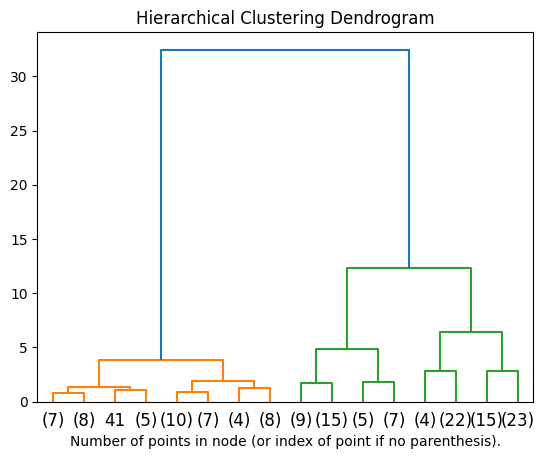

In [6]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Summary

In this lab, we learned how to plot the corresponding dendrogram of a hierarchical clustering using AgglomerativeClustering and the dendrogram method available in scipy. We loaded the iris dataset, created an agglomerative clustering model, and fit the model. Finally, we plotted the dendrogram using the **dendrogram()** function from the **scipy.cluster.hierarchy** module and the **plot_dendrogram()** function defined in the original code.